In [1]:
import numpy as np
import pandas as pd

### Quiz_2
- 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리세요

In [2]:
# 타이타닉 데이터 가져오기

In [76]:
titanic=pd.read_csv('train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [77]:
# ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제

In [78]:
titanic_f1=pd.DataFrame(titanic,columns=["Survived","Age"])
titanic_f1=titanic_f1[titanic_f1["Age"].notnull()]
titanic_f1.tail()

,Survived,Age
885,0,39.0
886,0,27.0
887,1,19.0
889,1,26.0
890,0,32.0


In [79]:
# Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입

In [80]:
def Ages(age):
    if age%10!=0:
        return age-(age%10)
    else:
        return age
    
titanic_f1["Ages"]=titanic_f1["Age"].apply(Ages)
titanic_f1.tail()

,Survived,Age,Ages
885,0,39.0,30.0
886,0,27.0,20.0
887,1,19.0,10.0
889,1,26.0,20.0
890,0,32.0,30.0


In [81]:
# 연령대별로 생존률

In [107]:
titanic_f1["Counts"]=1
titanic_f2=titanic_f1.pivot_table("Counts",["Ages"],["Survived"],aggfunc=np.sum)
titanic_f2

Survived,0,1
Ages,,
0.0,24.0,38.0
10.0,61.0,41.0
20.0,143.0,77.0
30.0,94.0,73.0
40.0,55.0,34.0
50.0,28.0,20.0
60.0,13.0,6.0
70.0,6.0,NaN
80.0,NaN,1.0


In [126]:
titanic_f2["survived_rate"]=round(titanic_f2[1]/(titanic_f2[0]+titanic_f2[1])*100,2)
df=titanic_f2.dropna()
df

Survived,0,1,survived_rate
Ages,,,
0.0,24.0,38.0,61.29
10.0,61.0,41.0,40.20
20.0,143.0,77.0,35.00
30.0,94.0,73.0,43.71
40.0,55.0,34.0,38.20
50.0,28.0,20.0,41.67
60.0,13.0,6.0,31.58


In [12]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>


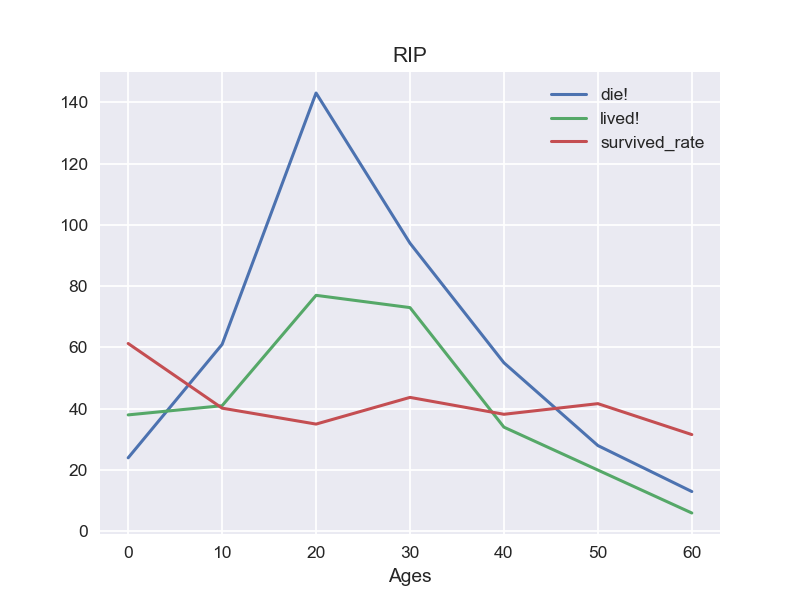

In [143]:
data1=df[0]
data2=df[1]
data3=df["survived_rate"]
plt.xlabel("Ages")
plt.title("RIP")
plt.plot(data1,label="die!")
plt.plot(data2,label="lived!")
plt.plot(data3,label="survived_rate")
plt.legend(loc=1)
plt.show()